In [1]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import polyakov
from modules import utility
from modules import fourier_surface


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df_1 = read_and_write.load_from_folder("./output_measure_surface/su4_44_44_64_6/beta_10.9","polyakov:", "complex")
#df_2 = read_and_write.load_from_folder("./output_measure_surface/su4","PRO 1 Origin polyakov smeared:", "complex")
#df_3 = read_and_write.load_from_folder("./output_measure_surface/su4","PRO 1 Average polyakov smeared:", "complex")
#df_4 = read_and_write.load_from_folder("./output_measure_surface/su6","Min:", "real")
#volume, surface_smooth = read_and_write.read_surface_data("./output_measure_surface/su4_surface_data")
#volume, fourier_profile = read_and_write.read_surface_data("./output_measure_surface/su4_surface_data", "fourier_profile")
#surface_discrete = read_and_write.read_3d_surface("./output_measure_surface/su4_surface_data","surface_discrete")


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', 'sum']


IndexError: list index out of range

In [57]:
folder_names = ["./output_measure_surface/su4_36_36_48_6",
                "./output_measure_surface/su4_44_44_64_6/beta_12",
                "./output_measure_surface/su4_44_44_64_6/beta_10.9",
                "./output_measure_surface/su4_44_44_64_6/beta_10.85"]
smooth_surfaces= []
smearing_levels = [5,10,15,30]
for i in smearing_levels:
    volume, fourier_profile = read_and_write.read_surface_data(folder_names[2], f"surface_smooth_{i}")
    smooth_surfaces.append(fourier_profile)

[44 44 64  6]


/home/haaaaron/SUN_twist_python_analysis/modules/read_and_write.py:131: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(io.StringIO('\n'.join(df_section)), delim_whitespace=True, skiprows=1)
/home/haaaaron/SUN_twist_python_analysis/modules/read_and_write.py:131: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(io.StringIO('\n'.join(df_section)), delim_whitespace=True, skiprows=1)
/home/haaaaron/SUN_twist_python_analysis/modules/read_and_write.py:131: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(io.StringIO('\n'.join(df_section)), delim_whitespace=True, skiprows=1)
/home/haaaaron/SUN_twist_python_analysis/modules/read_and_write.py:131: FutureWarning: T

[44 44 64  6]


/home/haaaaron/SUN_twist_python_analysis/modules/read_and_write.py:131: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(io.StringIO('\n'.join(df_section)), delim_whitespace=True, skiprows=1)
/home/haaaaron/SUN_twist_python_analysis/modules/read_and_write.py:131: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(io.StringIO('\n'.join(df_section)), delim_whitespace=True, skiprows=1)
/home/haaaaron/SUN_twist_python_analysis/modules/read_and_write.py:131: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(io.StringIO('\n'.join(df_section)), delim_whitespace=True, skiprows=1)
/home/haaaaron/SUN_twist_python_analysis/modules/read_and_write.py:131: FutureWarning: T

[44 44 64  6]


/home/haaaaron/SUN_twist_python_analysis/modules/read_and_write.py:131: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(io.StringIO('\n'.join(df_section)), delim_whitespace=True, skiprows=1)
/home/haaaaron/SUN_twist_python_analysis/modules/read_and_write.py:131: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(io.StringIO('\n'.join(df_section)), delim_whitespace=True, skiprows=1)
/home/haaaaron/SUN_twist_python_analysis/modules/read_and_write.py:131: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(io.StringIO('\n'.join(df_section)), delim_whitespace=True, skiprows=1)
/home/haaaaron/SUN_twist_python_analysis/modules/read_and_write.py:131: FutureWarning: T

[44 44 64  6]


/home/haaaaron/SUN_twist_python_analysis/modules/read_and_write.py:131: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(io.StringIO('\n'.join(df_section)), delim_whitespace=True, skiprows=1)
/home/haaaaron/SUN_twist_python_analysis/modules/read_and_write.py:131: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(io.StringIO('\n'.join(df_section)), delim_whitespace=True, skiprows=1)
/home/haaaaron/SUN_twist_python_analysis/modules/read_and_write.py:131: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(io.StringIO('\n'.join(df_section)), delim_whitespace=True, skiprows=1)
/home/haaaaron/SUN_twist_python_analysis/modules/read_and_write.py:131: FutureWarning: T

In [37]:
#volume, surface_smooth = read_and_write.read_surface_data("./output_measure_surface/su4_36_36_48_6")
volume, fourier_profile = read_and_write.read_surface_data("./output_measure_surface/su4_36_36_48_6", "fourier_profile")

[32 32 48  6]


In [55]:
for df in smooth_surfaces[0]:
    df_mask = df["z"] > int(volume[2] * 0.5)
    df.loc[df_mask, "z"] = df.loc[df_mask, "z"] - int(volume[2])


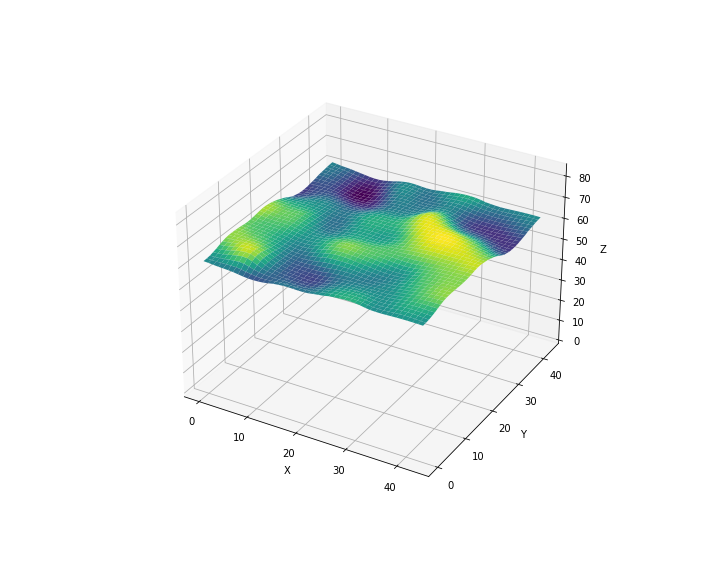

In [68]:
%matplotlib widget
fourier_surface.surface_in_3d(smooth_surfaces[3][843])



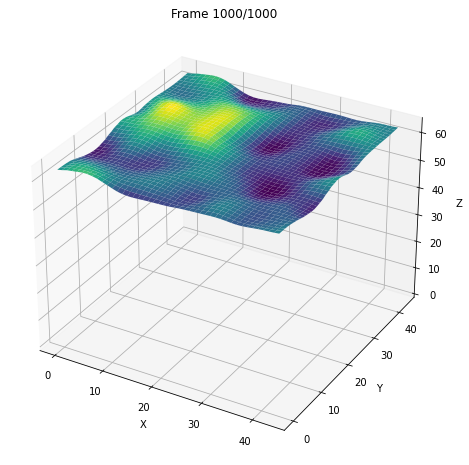

In [63]:
%matplotlib inline
fourier_surface.animate_surface_in_3d(smooth_surfaces[3],volume,fps=10)


In [ ]:
#print(df_1["10 1"])
#df = df_1["16 1"].drop(columns=['sum']).iloc[990:,:]
df = df_2["16 1"].iloc[:,:]
polyakov.animate_polar(df)
#df

In [11]:
# def parse_to_complex(tuple_str):
#     real, imag = ast.literal_eval(tuple_str)
#     return complex(real, imag)

# # Use pandas read_csv with a custom converter for the tuples to complex numbers
# file_path = './input.txt'  # Replace with your file path


# with open(file_path, 'r') as file:
#     csv_data = file.read()
    
# df = pd.read_csv(
#     "./input.txt",
#     sep=' ',
#     header=None,
#     names=['Label', 'Something', 'z-index', 'Area average', 'Origin'],
#     converters={'Area average': parse_to_complex, 'Origin': parse_to_complex}
# )
# z_index = df["z-index"].values
# area_average = df["Area average"].values
# origin = df["Origin"].values

#df_yes = df_4["10 1"]["ind"] == 25
df_1 = df_1["13 2"].drop(columns=['sum'])
df_2 = df_2["13 2"]
df_3 = df_3["13 2"]

polyakov_z_index = df_1.iloc[-1].values
origin = df_2.iloc[-1].values
area_average = df_3.iloc[-1].values
z_index = df_3.columns
#polar_plot(area_average,z_index,title="Average z-index smeared")
#polar_plot(origin,z_index,title="z-index origin smeared")
#polar_plot(polyakov_z_index,z_index,title="Average z-index")
polyakov.create_figure_polar_zindex(df_1)


(0.0155471-0.00205771j)


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'complex'